Lets us try to understand MLPs with a simple example of predicting the heigth of a ball as a function of time

In [8]:
# importing libraries
import torch
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

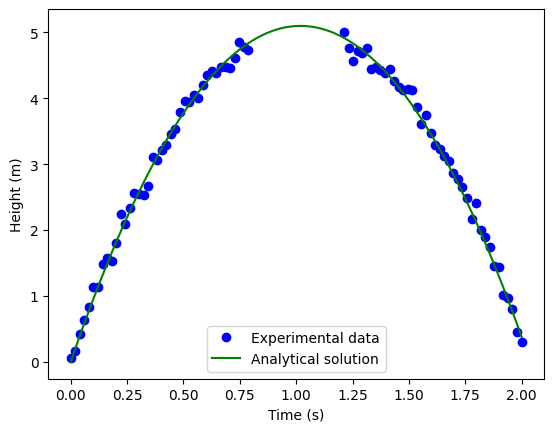

In [81]:
# Generate the experimental dataset

t_anal = np.linspace(0, 2, 100)
u0 = 10; g= 9.81
h_anal = u0*t_anal - 0.5*g*t_anal**2

# Add noise to the analytical solution data
h_expt= h_anal + np.random.normal(0, 0.1, 100)
h_expt = np.concatenate((h_expt[0:40], h_expt[60:])) 

t_expt = np.concatenate((t_anal[0:40], t_anal[60:])) 

# Plot the data
plt.plot(t_expt, h_expt, 'o', label = 'Experimental data', color = 'blue')
plt.plot(t_anal, h_anal, '-', label = 'Analytical solution', color = 'green')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.show()

In [73]:
# Now using a simple MLP architecture we try to predict the height after t= 1.5s

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Define the model
class mlp_model(nn.Module):
    def __init__(self):
        super().__init__()
        n = 100
        self.fc1 = nn.Linear(1, n)
        self.fc2 = nn.Linear(n, n)
        self.fc3 = nn.Linear(n, 1)
    
    def forward(self, t):
        h = self.fc1(t)
        h = F.relu(h)
        h = self.fc2(h)
        h = F.tanh(h)
        h = self.fc3(h)

        return h

In [79]:
model = mlp_model()

# Convert the data to tensors
h_train = h_expt ; t_train = t_expt
h_train_torch = torch.tensor(h_train, dtype=torch.float32).reshape(-1, 1)
t_train_torch = torch.tensor(t_train, dtype=torch.float32).reshape(-1, 1)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

# Train the model
n_epochs = 1000
for epoch in range(n_epochs):
    n_batches = 30; i = 0
    batch_size = len(t_train)//n_batches
    for b in range(n_batches):
        t_t = t_train[i*batch_size:(i+1)*batch_size]  
        t_t = torch.tensor(t_t, dtype=torch.float32).reshape(-1, 1)

        h_train_t = h_train[i*batch_size:(i+1)*batch_size]
        h_train_t = torch.tensor(h_train_t, dtype=torch.float32).reshape(-1, 1)

        optimizer.zero_grad()
        h_pred_t = model(t_t)
        loss = criterion(h_pred_t, h_train_t)
        loss.backward()       #computes the gradient of the loss with respect to the model parameters

        optimizer.step()      #updates the model parameters based on the computed gradients
        print(f'Epoch: {epoch+1}/{n_epochs}, Batch: {b+1}/{n_batches}, Loss: {loss.item():.4f}')
        i += 1


Epoch: 1/1000, Batch: 1/30, Loss: 0.1054
Epoch: 1/1000, Batch: 2/30, Loss: 0.5842
Epoch: 1/1000, Batch: 3/30, Loss: 1.0555
Epoch: 1/1000, Batch: 4/30, Loss: 1.9818
Epoch: 1/1000, Batch: 5/30, Loss: 2.6489
Epoch: 1/1000, Batch: 6/30, Loss: 3.7416
Epoch: 1/1000, Batch: 7/30, Loss: 4.4032
Epoch: 1/1000, Batch: 8/30, Loss: 5.8767
Epoch: 1/1000, Batch: 9/30, Loss: 7.1251
Epoch: 1/1000, Batch: 10/30, Loss: 8.4466
Epoch: 1/1000, Batch: 11/30, Loss: 10.2378
Epoch: 1/1000, Batch: 12/30, Loss: 9.8712
Epoch: 1/1000, Batch: 13/30, Loss: 10.6676
Epoch: 1/1000, Batch: 14/30, Loss: 11.6855
Epoch: 1/1000, Batch: 15/30, Loss: 11.2874
Epoch: 1/1000, Batch: 16/30, Loss: 12.4867
Epoch: 1/1000, Batch: 17/30, Loss: 13.3860
Epoch: 1/1000, Batch: 18/30, Loss: 12.3826
Epoch: 1/1000, Batch: 19/30, Loss: 12.4772
Epoch: 1/1000, Batch: 20/30, Loss: 12.2582
Epoch: 1/1000, Batch: 21/30, Loss: 9.2940
Epoch: 1/1000, Batch: 22/30, Loss: 8.8650
Epoch: 1/1000, Batch: 23/30, Loss: 7.2049
Epoch: 1/1000, Batch: 24/30, Loss:

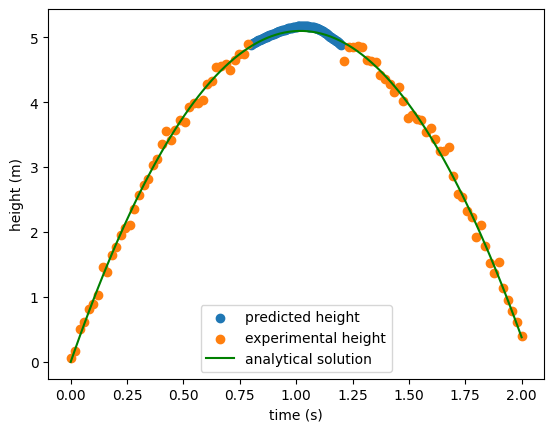

In [83]:
# we predict the model on something which it has not seen before
t_pred = np.linspace(0.8 ,1.2, 100)
t_pred_torch = torch.tensor(t_pred, dtype= torch.float32).reshape(-1, 1)
h_pred_torch = model(t_pred_torch)

plt.scatter(t_pred.reshape(-1), h_pred_torch.detach().numpy().reshape(-1), label= 'predicted height')
plt.scatter(t_train.reshape(-1), h_train.reshape(-1), label= 'experimental height')
plt.plot(t_anal, h_anal, 'green', label= 'analytical solution')
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('height (m)')
plt.show()